## W07 Class Assignment
**Jessica Laurentia Tedja - 0706022310008**

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# **Part A: Data Understanding, Cleaning, Visualizations**

In [195]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [197]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [198]:
# rename the Annual Income (k$) & Spending Score (1-100) column
df.rename(columns={'Annual Income (k$)': 'Annual Income'}, inplace=True)
df.rename(columns={'Spending Score (1-100)': 'Spending Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [199]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'CustomerID': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175,

In [200]:
df = df.drop(columns=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


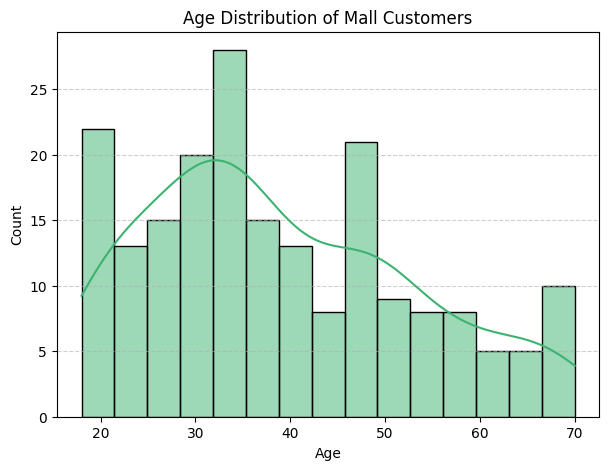

In [218]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], bins=15, kde=True, color='mediumseagreen')
plt.title('Age Distribution of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-1835838489.py:3: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



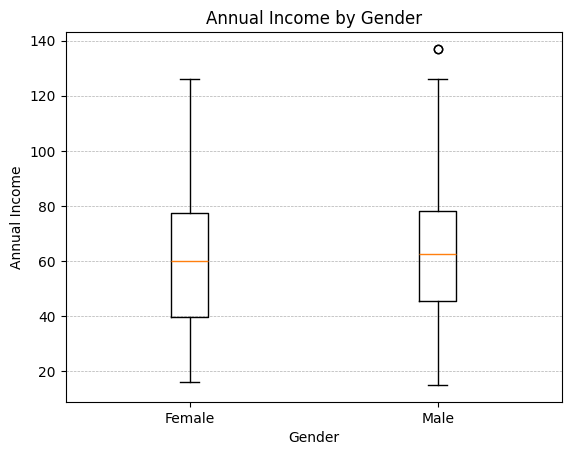

In [201]:
# visualization with box plot
plt.figure()
plt.boxplot([
    df[df['Gender'] == 'Female']['Annual Income'].dropna(),
    df[df['Gender'] == 'Male']['Annual Income'].dropna()
], labels=['Female', 'Male'])
plt.title('Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [204]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income',
    z='Spending Score',
    color='Spending Score',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Annual Income vs Spending Score',
    labels={
        'Age': 'Age',
        'Annual Income': 'Annual Income',
        'Spending Score': 'Spending Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

# **Part B: Data Transformation**

In [205]:
# Encoding Data
# Encode Gender: Female = 0, Male = 1
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df.head()


,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [206]:
# Scaling with Standard Scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

df_scaled.head()

# visualization
fig = px.scatter_3d(
    df_scaled,
    x='Age',
    y='Annual Income',
    z='Spending Score',
    color='Spending Score',  # opsional: warnai berdasarkan Spending Score
    color_continuous_scale='Blues',
    opacity=0.7,
    title='3D Visualization of Scaled Data (Age, Income, Spending Score)',
    labels={
        'Age': 'Scaled Age',
        'Annual Income': 'Scaled Annual Income',
        'Spending Score': 'Scaled Spending Score'
    }
)

fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='darkblue')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False),
))

fig.show()

# **Part C: Choosing K**

In [207]:
from sklearn.cluster import KMeans

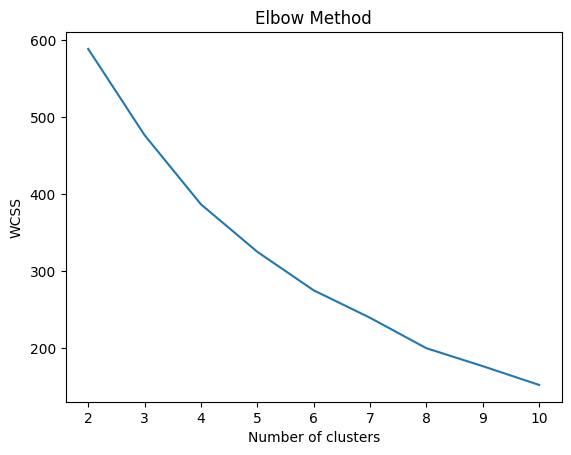

In [208]:
wcss = []
for i in range(2, 11):   #clusters 2-11
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [209]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   2  588.802677
1                   3  476.787554
2                   4  386.828426
3                   5  325.094980
4                   6  275.030671
5                   7  239.327862
6                   8  199.750461
7                   9  176.419096
8                  10  152.029834


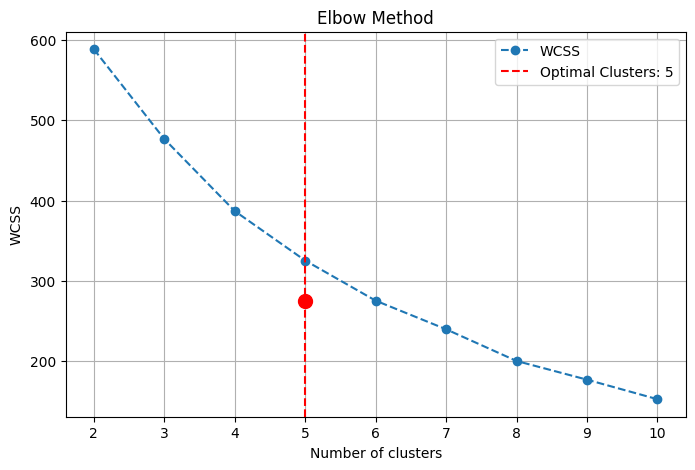

The optimal number of clusters is: 5


In [210]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

# **Part D: Modeling with K-Means**

In [211]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Annual Income,Spending Score,KMeans_Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4


/tmp/ipython-input-487855173.py:4: UserWarning:


The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.



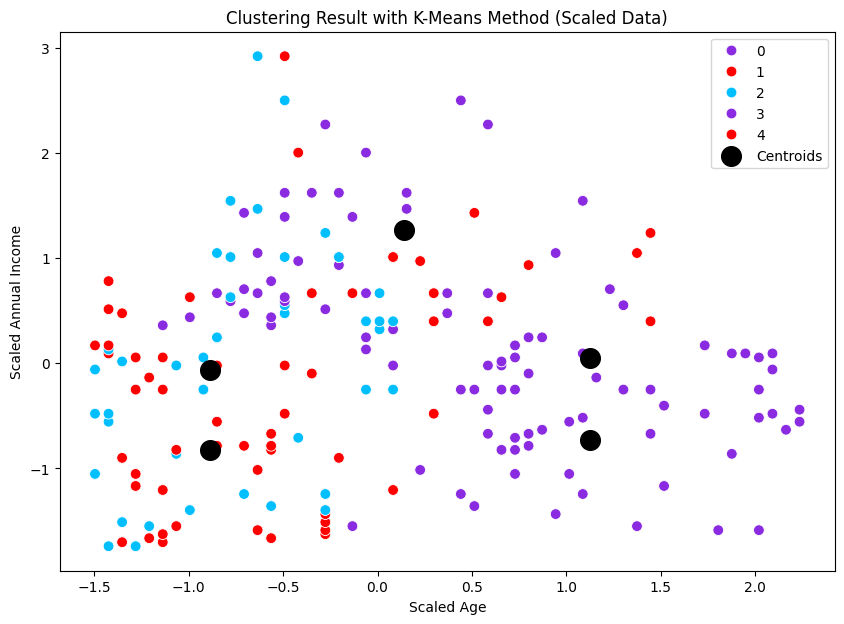

In [212]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

/tmp/ipython-input-3235196876.py:4: UserWarning:


The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.



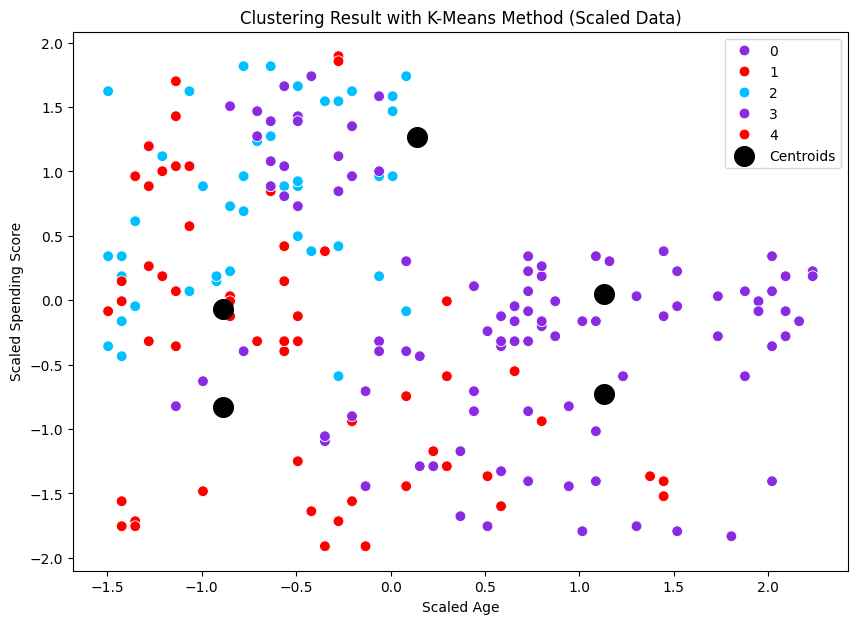

In [213]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

/tmp/ipython-input-546301037.py:4: UserWarning:


The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.



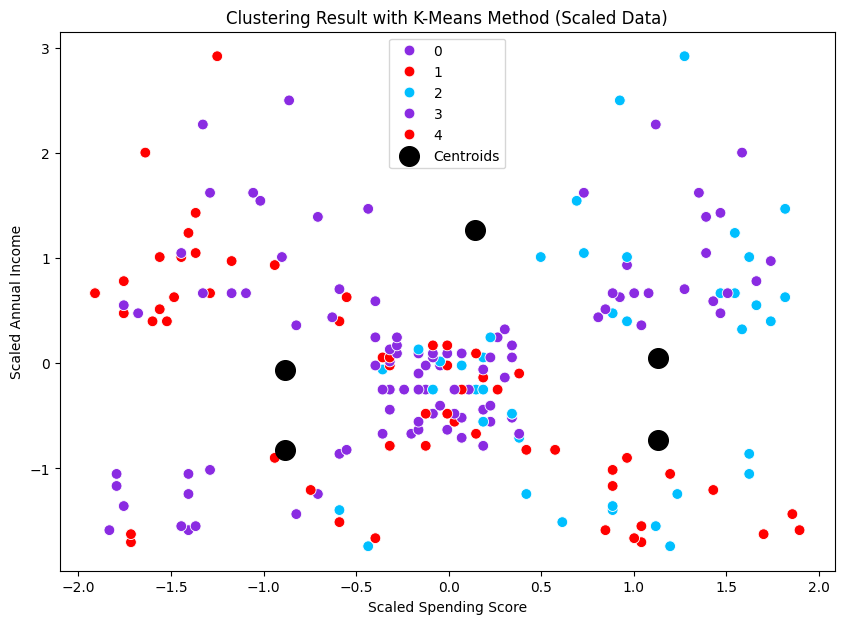

In [214]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Spending Score", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Spending Score")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

# **Part E: Cluster Profiling & Insights**

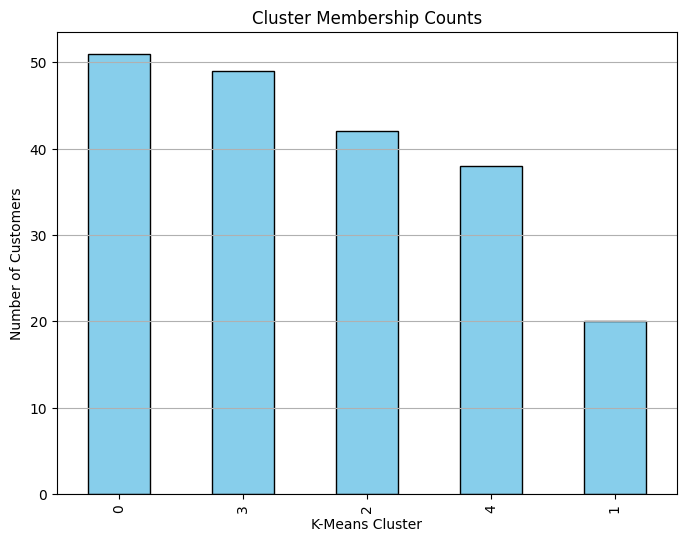

In [215]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [217]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Gender' : mode_func,
                                            'Spending Score' : ['mean', 'min', 'max'],
                                             'Age': ['mean', 'min', 'max'],
                                              'Annual Income': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary


Gender Spending Score                Age          \
               mode_func           mean min max       mean min max   
KMeans_cluster                                                       
0                      1      39.313725   3  60  56.470588  37  70   
1                      1      14.050000   1  36  39.500000  19  59   
2                      1      70.238095  35  97  28.690476  18  40   
3                      0      54.448980   7  95  37.897959  23  56   
4                      0      56.210526   6  99  27.315789  18  43   

               Annual Income           
                        mean min  max  
KMeans_cluster                         
0                  46.098039  19   75  
1                  85.150000  71  137  
2                  60.904762  15  137  
3                  82.122449  54  126  
4                  38.842105  16   65

**Cluster 0 – Older / Mid-Spending Customers**

Profile:
* Average age: 56 years (range 37–70).
* Average annual income: ≈$46K.
* Average spending score: ≈39 (moderate).

Implications:
* Focus on value-based products with quality and practicality.
* Offer loyalty rewards for consistent customers.
Use email campaigns or offline events (less social-media oriented).
* Provide bundled offers or cashback incentives for long-term retention.

**Cluster 1 – Mature / High-Income Professionals (Low Spenders)**
Profile:
* Average age: ~39 years old.
* Highest income: ~$85K
* Majority male (Gender = 1).

Implications:
* These are wealthy but conservative shoppers — emphasize trust, durability, and prestige.
* Introduce exclusive memberships, premium warranties, or VIP after-sales services.
* Focus marketing on brand reliability rather than discounts.
Use professional networks (LinkedIn, newsletters) for engagement.

**Cluster 2 – Young / High-Spending Segment**

Profile:
* Average age: ~28 years old (range 18–40).
* Income: ~$61K, moderate but balanced.
* Highest spending score (~70) → active, impulsive, and trend-driven.

Implications:
* Promote limited-time offers, flash sales, and new product launches.
* Use social media ads, influencer marketing, and gamified loyalty programs.
* Focus on digital payment convenience and app-based engagement.
* Highlight lifestyle, fun, and exclusivity in messaging.

**Cluster 3 – Mid-Age / Moderate-Income Females**

Profile:
* Average age: ~38 years old.
* Income: ~$82K, middle-high.
* Spending score: ~54, moderate to high.

Implications:
* Offer lifestyle and family-oriented campaigns.
* Provide mid-range premium products — balance between luxury and practicality.
* Leverage Instagram, Facebook, and loyalty apps for ongoing interaction.
* Bundle offers that emphasize comfort, trust, and convenience.

**Cluster 4 – Young / Low-Income, Value-Oriented Shoppers**

Profile:
* Average age: ~27 years old.
* Lowest income: ~$39K.
* Moderate spending score (~56).

Implications:
* Focus on budget-friendly offers and discount-based campaigns.
* Use short-form content marketing (TikTok, IG Reels) targeting Gen Z.
* Encourage engagement through student loyalty programs and referral codes.
* Promote installment or cashback options to ease purchase decisions.